In [1]:
# This program expands and evaluates the elliptic integral given in 4.30.
# Author: Alex Correia
# Date: 6/21/21

from sympy import *
init_printing(pretty_print=True)
r = symbols("rho", positive=True)
x = symbols("theta")

def integrand(r, x):
    return 1/sqrt(1+r*r-2*r*cos(x))

f = series(integrand(r, x), r,0,7) #expand integrand as a Maclaurin series to 7th term
f

In [2]:
integrate(f, (x, 0, 2*pi))

Text(0.5, 1.0, 'E4.6c - Precession vs $M/a^3$')

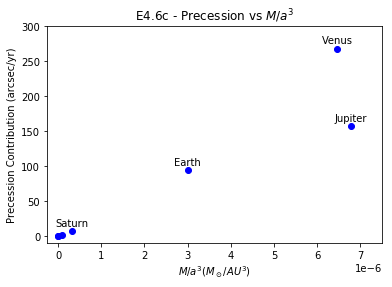

In [59]:
# This program plots the relationship between precession contributions and planetary parameters.

import matplotlib.pyplot as plt

# given data
mass = [2.448E-6, 3.004E-6, 3.227E-7, 9.551E-4, 2.859E-4, 4.355E-5, 5.178E-5] # masses (M_sun)
axes = [0.7233, 1.0, 1.5237, 5.2029, 9.5367, 19.189, 30.070] # semimajor axes (AU)
cont = [267.4, 94.7, 2.38, 157.2, 7.58, 0.141, 0.0437] # Mercurial precession contributions (arcsec/century)
points = [] # placeholder for x vals to plot (M_sun/AU**3)
names = ["Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"] # labels

for i in range(len(axes)):
    points.append(mass[i]/(axes[i]**3)) # calculate M/a^3 for x-axis
    if points[i] > 10**-6.9: # don't label points very close together
        plt.annotate(names[i], (points[i], cont[i]), textcoords="offset points", xytext=(0, 5), ha="center")
    else:
        pass

#plot on linear scale   
plt.plot(points, cont, 'bo')
plt.xlim(-2.5E-7, 7.5E-6), plt.ylim(-10, 300)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlabel("$M/a^3 (M_\odot/AU^3)$")
plt.ylabel("Precession Contribution (arcsec/yr)")
plt.title("E4.6c - Precession vs $M/a^3$")

In [ ]:
'''
Observations:

c) The linear relationship between M/a^3 and precession contribution is much less clear when using linear scales. Most
planets have miniscule contributions due to their high distance or low mass, and as such over half of the points inhabit
the lower left quadrant of the plot. Meanwhile, the three most significant points (Earth, Jupiter, and Venus) are
comparatively very far apart, with a seemingly very weak linear correlation between them. 
'''